Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
#loading the data
df = pd.read_csv(r'C:\Users\ABCD\OneDrive\Documents\_CP30-EduSpend\SDS-CP030-edu-spend\submissions\team-members\lakshay-yadav\data\International_Education_Costs.csv')
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [4]:
df.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000


Checking for Missing Values

In [5]:
# Check for missing data
df.isnull().sum().sort_values(ascending=False)

# Percentage of missing values
df.isnull().mean() * 100

Country              0.0
City                 0.0
University           0.0
Program              0.0
Level                0.0
Duration_Years       0.0
Tuition_USD          0.0
Living_Cost_Index    0.0
Rent_USD             0.0
Visa_Fee_USD         0.0
Insurance_USD        0.0
Exchange_Rate        0.0
dtype: float64

Plot Feature Distributions

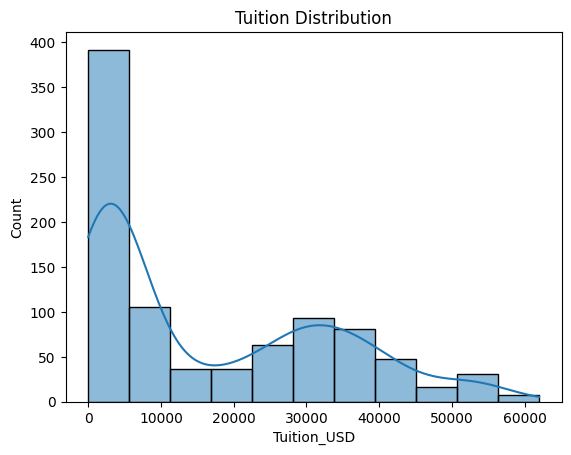

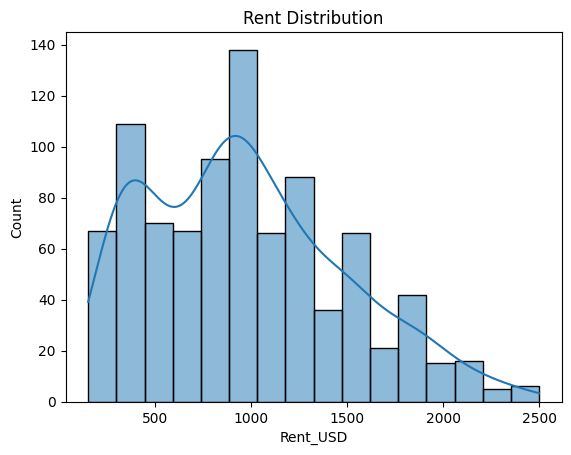

In [6]:
# Tuition Distribution
sns.histplot(df['Tuition_USD'], kde=True)
plt.title('Tuition Distribution')
plt.show()

# Rent Distribution
sns.histplot(df['Rent_USD'], kde=True)
plt.title('Rent Distribution')
plt.show()

Correlation Heatmap

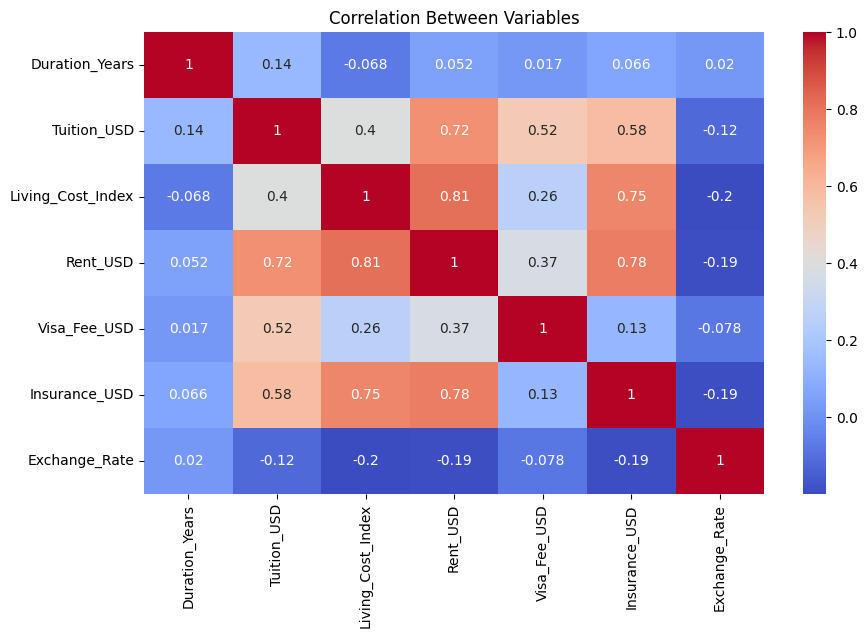

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()

Computing Total Cost of Attendance (TCA): (tuition + rent × months + visa + insurance × years)

In [8]:
# Assuming standard duration and months
DURATION_YEARS = 1
MONTHS = 12

df['TCA'] = df['Tuition_USD'] + (df['Rent_USD'] * MONTHS) + df['Visa_Fee_USD'] + (df['Insurance_USD'] * DURATION_YEARS)
df[['Country', 'City', 'Level', 'TCA']].head()

,Country,City,Level,TCA
0,USA,Cambridge,Master,83460
1,UK,London,Master,64085
2,Canada,Toronto,Master,58835
3,Australia,Melbourne,Master,59900
4,Germany,Munich,Master,14325


Visualizing TCA by Country and Degree Level

In [9]:
import plotly.express as px

# Average TCA by Country
avg_tca_country = df.groupby('Country')['TCA'].mean().reset_index()
fig = px.bar(avg_tca_country.sort_values(by='TCA', ascending=False), x='Country', y='TCA', title='Average TCA by Country')
fig.show()

# TCA by Level
fig = px.box(df, x='Level', y='TCA', title='TCA Distribution by Degree Level')
fig.show()


In [10]:
# Creating labels as Low/Medium/High using quantiles
df['Affordability_Tier'] = pd.qcut(df['TCA'], q=3, labels=['Low', 'Medium', 'High'])
df[['TCA', 'Affordability_Tier']].head()


,TCA,Affordability_Tier
0,83460,High
1,64085,High
2,58835,High
3,59900,High
4,14325,Medium


In [11]:
# Visualizing TCA by Affordability Tier
fig = px.box(df, x='Affordability_Tier', y='TCA', title='TCA Distribution by Affordability Tier')
fig.show()

Saving Clean Data

In [12]:
#df.to_csv('cleaned_education_costs.csv', index=False)

Feature engineering (scaling numeric values, encoding categories)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select features and targets
features = ['Country', 'City', 'Level', 'Tuition_USD', 'Rent_USD', 'Insurance_USD']
target_reg = 'TCA'
target_cls = 'Affordability_Tier'

X = df[features]
y_reg = df[target_reg]
y_cls = df[target_cls]

# Split data
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=0.2, random_state=42)

# Define transformers
cat_cols = ['Country', 'City', 'Level']
num_cols = ['Tuition_USD', 'Rent_USD', 'Insurance_USD']

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])


Training a random forest regressor to predict TCA

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

reg_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

reg_pipeline.fit(X_train, y_train_reg)
y_pred_reg = reg_pipeline.predict(X_test)

print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))
print("R²:", r2_score(y_test_reg, y_pred_reg))


MAE: 447.05060439560435
RMSE: 673.0528516725157
R²: 0.9989553938317841


Training a classifier to label destinations as Low, Medium, or High cost

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

cls_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

cls_pipeline.fit(X_train, y_train_cls)
y_pred_cls = cls_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print("F1 Score (macro):", f1_score(y_test_cls, y_pred_cls, average='macro'))


Accuracy: 0.9285714285714286
F1 Score (macro): 0.9296183759142177


Evaluating model performance with metrics and charts

Confusion Matrix

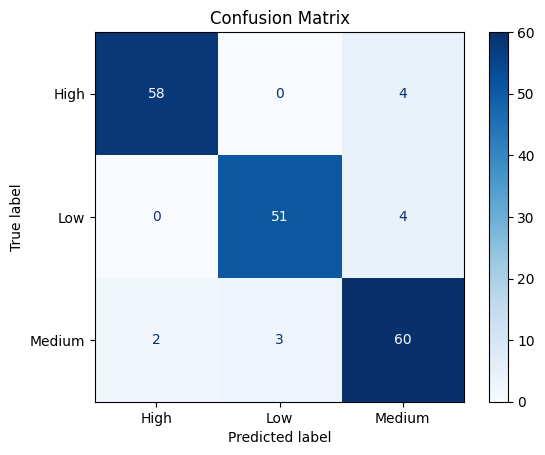

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_cls, y_pred_cls)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls_pipeline.named_steps['classifier'].classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


ROC-Curve

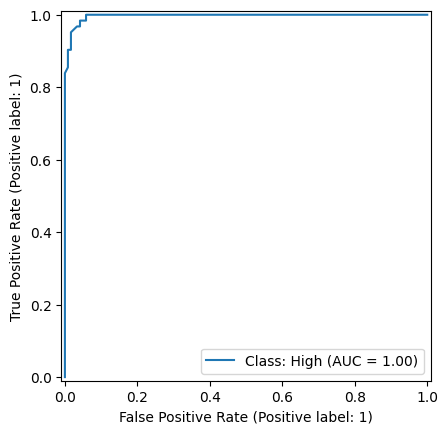

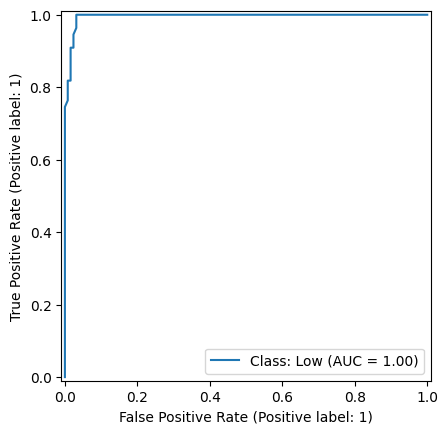

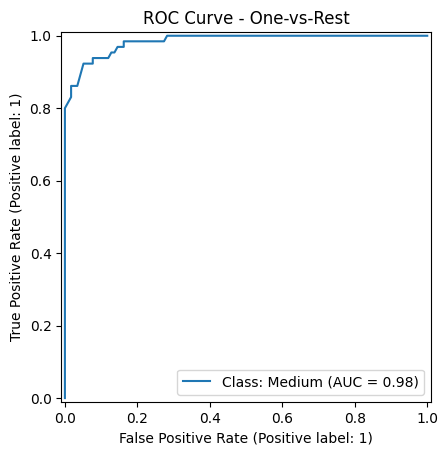

In [17]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

y_score = cls_pipeline.predict_proba(X_test)
y_test_bin = label_binarize(y_test_cls, classes=cls_pipeline.named_steps['classifier'].classes_)

for i, class_name in enumerate(cls_pipeline.named_steps['classifier'].classes_):
    RocCurveDisplay.from_predictions(y_test_bin[:, i], y_score[:, i], name=f"Class: {class_name}")
plt.title("ROC Curve - One-vs-Rest")
plt.show()


Visualizing clustering using PCA

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X_scaled = preprocessor.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=clusters, cmap='tab10')
plt.title("University Clusters (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster ID")
plt.tight_layout()
plt.show()

c:\Users\ABCD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



AttributeError: 'NoneType' object has no attribute 'split'

In [19]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"